In [1]:
from google.colab import drive
drive.mount('./MyDrive')

Mounted at ./MyDrive


In [2]:
cd MyDrive/MyDrive/deepLearning/dataset

/content/MyDrive/MyDrive/deepLearning/dataset


In [3]:
import os
import pandas as pd
# Use local data file or download from GitHub
docker_data_path = "/home/h2o/data/nlp/stopwords.csv"
if os.path.isfile(docker_data_path):
    data_path = docker_data_path
else:
    data_path = "https://raw.githubusercontent.com/h2oai/h2o-tutorials/master/h2o-world-2017/nlp/stopwords.csv"

STOP_WORDS = pd.read_csv(data_path, header=0)
STOP_WORDS = list(STOP_WORDS['STOP_WORD'])

In [4]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [5]:
anx = pd.read_csv('anx_c.csv')
bi = pd.read_csv('bi_c.csv')
sch = pd.read_csv('sch_c.csv')
adhd = pd.read_csv('adhd_c.csv')
dep = pd.read_csv('dep_c.csv')
nonM = pd.read_csv('nonM_c.csv')

In [6]:
minimum = min(len(bi),len(nonM),len(anx),len(adhd),len(dep),len(sch))

In [7]:
anx = anx.dropna(how = 'any')
bi = bi.dropna(how='any')
sch = sch.dropna(how='any')
adhd = adhd.dropna(how='any')
dep = dep.dropna(how='any')
nonM = nonM.dropna(how='any')

In [8]:
dep_s = dep.sample(n = minimum,random_state = 1)
nonM_s = nonM.sample(n = minimum,random_state = 1)
anx_s = anx.sample(n = minimum,random_state = 1)
sch_s = sch.sample(n = minimum,random_state = 1)
bi_s = bi.sample(n = minimum,random_state = 1)
adhd_s = adhd.sample(n = minimum,random_state = 1)

In [9]:
data = pd.concat([dep_s[['content','class']],
                  nonM_s[['content','class']],
                  anx_s[['content','class']],
                  bi_s[['content','class']],
                  sch_s[['content','class']],
                  adhd_s[['content','class']]])

In [10]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(data,test_size=0.3,random_state=1,stratify = data['class'])
valid,test = train_test_split(test,test_size=2/3,random_state=1,stratify=test['class'])


print(train.groupby('class').count())
print(valid.groupby('class').count())
print(test.groupby('class').count())

       content
class         
adhd      9208
anx       9209
bi        9209
dep       9208
nonM      9209
sch       9208
       content
class         
adhd      1316
anx       1315
bi        1315
dep       1316
nonM      1315
sch       1316
       content
class         
adhd      2631
anx       2631
bi        2631
dep       2631
nonM      2631
sch       2631


In [11]:
from nltk.tokenize import word_tokenize
x_train = []
for i in train['content'].values:
    i = i.lower()
    tok = word_tokenize(i)
    for i in STOP_WORDS:
        if i in tok:
            tok.remove(i)
    x_train.append(tok)

x_valid = []
for i in valid['content'].values:
    i = i.lower()
    tok = word_tokenize(i)
    for i in STOP_WORDS:
        if i in tok:
            tok.remove(i)
    x_valid.append(tok)
    
x_test = []
for i in test['content'].values:
    i = i.lower()
    tok = word_tokenize(i)
    for i in STOP_WORDS:
        if i in tok:
            tok.remove(i)
    x_test.append(tok)

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from collections import Counter
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

y_train = train['class'].values
y_valid = valid['class'].values
y_test = test['class'].values
convert = {"nonM":0,"dep":1,"anx":2,"bi":3,'adhd':4,'sch':5}
y_train_l = []
for i in y_train:
  y_train_l.append(convert[i])

y_valid_l = []
for i in y_valid:
  y_valid_l.append(convert[i])

    
y_test_l = []
for i in y_test:
  y_test_l.append(convert[i])

y_train_l = to_categorical(y_train_l) 
y_valid_l = to_categorical(y_valid_l)
y_test_l = to_categorical(y_test_l) 

In [13]:
y_test_l.shape

(15786, 6)

In [14]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)

In [15]:
threshold = 2
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 71089
등장 빈도가 1번 이하인 희귀 단어의 수: 34306
단어 집합에서 희귀 단어의 비율: 48.25781766518027
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 0.3484953070565068


In [16]:
# 전체 단어 개수 중 빈도수 2이하인 단어 개수는 제거.
# 0번 패딩 토큰과 1번 OOV 토큰을 고려하여 +2
vocab_size = total_cnt - rare_cnt + 2
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 36785


In [17]:
tokenizer = Tokenizer(vocab_size, oov_token = 'OOV')
tokenizer.fit_on_texts(x_train)
X_train = tokenizer.texts_to_sequences(x_train)
X_valid = tokenizer.texts_to_sequences(x_valid)
X_test = tokenizer.texts_to_sequences(x_test)

content의 최대 길이 : 7225
content의 평균 길이 : 178.1693544008253


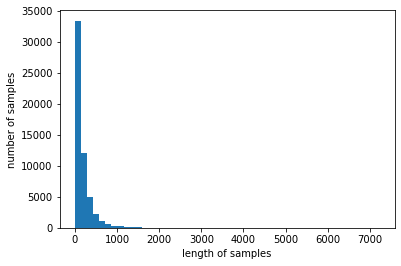

In [18]:
print('content의 최대 길이 :',max(len(l) for l in X_train))
print('content의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [19]:
def below_threshold_len(max_len, nested_list):
    cnt = 0
    for s in nested_list:
        if(len(s) <= max_len):
            cnt = cnt + 1
    print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))
    
#max_len = 256
max_len = 512
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 512 이하인 샘플의 비율: 93.63088450887767


In [20]:
X_train_p = pad_sequences(X_train, maxlen = max_len)
X_test_p = pad_sequences(X_test, maxlen = max_len)
X_valid_p = pad_sequences(X_valid,maxlen = max_len)

In [21]:
X_train_p.shape

(55251, 512)

In [22]:
import tensorflow as tf
class BahdanauAttention(tf.keras.layers.Layer):
  def __init__(self, units=64,**kwargs):
    super(BahdanauAttention, self).__init__()
    self.W1 = Dense(units)
    self.W2 = Dense(units)
    self.V = Dense(1)

  def get_config(self):
      config = super().get_config().copy()
      config.update({
          'W1':self.W1,
          'W2': self.W2,
          'V': self.V
      })
      return config

  def call(self, values, query): # 단, key와 value는 같음
    # query shape == (batch_size, hidden size)
    # hidden_with_time_axis shape == (batch_size, 1, hidden size)
    # score 계산을 위해 뒤에서 할 덧셈을 위해서 차원을 변경해줍니다.
    hidden_with_time_axis = tf.expand_dims(query, 1)

    # score shape == (batch_size, max_length, 1)
    # we get 1 at the last axis because we are applying score to self.V
    # the shape of the tensor before applying self.V is (batch_size, max_length, units)
    score = self.V(tf.nn.tanh(
        self.W1(values) + self.W2(hidden_with_time_axis)))

    # attention_weights shape == (batch_size, max_length, 1)
    attention_weights = tf.nn.softmax(score, axis=1)

    # context_vector shape after sum == (batch_size, hidden_size)
    context_vector = attention_weights * values
    context_vector = tf.reduce_sum(context_vector, axis=1)

    return context_vector, attention_weights

In [23]:
from tensorflow.keras.layers import Dense, Embedding, Bidirectional, LSTM, Concatenate, Dropout
from tensorflow.keras import Input, Model
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import os

In [24]:
sequence_input = Input(shape=(max_len,), dtype='int32')
embedded_sequences = Embedding(vocab_size, 128)(sequence_input)

In [25]:
lstm = Bidirectional(LSTM(64, return_sequences = True))(embedded_sequences)

In [26]:
lstm, forward_h, forward_c, backward_h, backward_c = Bidirectional(LSTM(64,return_sequences=True, return_state=True))(lstm)

In [27]:
print(lstm.shape, forward_h.shape, forward_c.shape, backward_h.shape, backward_c.shape)

(None, 512, 128) (None, 64) (None, 64) (None, 64) (None, 64)


In [28]:
state_h = Concatenate()([forward_h, backward_h]) # 은닉 상태
state_c = Concatenate()([forward_c, backward_c]) # 셀 상태

In [29]:
attention = BahdanauAttention() # 가중치 크기 정의
context_vector, attention_weights = attention(lstm, state_h)

In [30]:
#dense1 = Dense(20, activation="relu")(context_vector)
#dropout = Dropout(0.5)(dense1)
output = Dense(6, activation="softmax")(context_vector)
model = Model(inputs=sequence_input, outputs=output)

In [31]:
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model_lstm_a_r.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [32]:
model.compile(optimizer="adam", loss = "categorical_crossentropy", metrics=["accuracy"])
history = model.fit(X_train_p, y_train_l, batch_size=256, epochs=30, callbacks=[es, mc],validation_data=(X_valid_p, y_valid_l))

Epoch 1/30
216/216 [==============================] - 109s 447ms/step - loss: 1.0849 - accuracy: 0.5744 - val_loss: 0.5926 - val_accuracy: 0.8102

Epoch 00001: val_accuracy improved from -inf to 0.81021, saving model to best_model_lstm_a_r.h5
Epoch 2/30
216/216 [==============================] - 96s 442ms/step - loss: 0.4523 - accuracy: 0.8535 - val_loss: 0.5542 - val_accuracy: 0.8184

Epoch 00002: val_accuracy improved from 0.81021 to 0.81845, saving model to best_model_lstm_a_r.h5
Epoch 3/30
216/216 [==============================] - 96s 444ms/step - loss: 0.3237 - accuracy: 0.8984 - val_loss: 0.5798 - val_accuracy: 0.8157

Epoch 00003: val_accuracy did not improve from 0.81845
Epoch 4/30
216/216 [==============================] - 96s 443ms/step - loss: 0.2440 - accuracy: 0.9247 - val_loss: 0.6332 - val_accuracy: 0.8086

Epoch 00004: val_accuracy did not improve from 0.81845
Epoch 5/30
216/216 [==============================] - 96s 443ms/step - loss: 0.1865 - accuracy: 0.9434 - val_l

In [33]:
from tensorflow.keras.models import load_model
loaded_model = load_model('best_model_lstm_a_r.h5',custom_objects={'BahdanauAttention':BahdanauAttention})

print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test_p, y_test_l)[1]))


494/494 [==============================] - 75s 148ms/step - loss: 0.5495 - accuracy: 0.8184

 테스트 정확도: 0.8184


In [34]:
from sklearn.metrics import classification_report
result = np.array(loaded_model.predict(X_test_p)).tolist()
test_label = [np.argmax(i) for i in y_test_l]
predict_label = [np.argmax(i) for i in result]
target_names = ['nonM', 'dep', 'anx','bi','adhd','sch']
print(classification_report(test_label, predict_label, target_names=target_names))

              precision    recall  f1-score   support

        nonM       0.89      0.86      0.88      2631
         dep       0.71      0.82      0.76      2631
         anx       0.84      0.79      0.81      2631
          bi       0.89      0.72      0.80      2631
        adhd       0.90      0.86      0.88      2631
         sch       0.72      0.87      0.79      2631

    accuracy                           0.82     15786
   macro avg       0.83      0.82      0.82     15786
weighted avg       0.83      0.82      0.82     15786

